<a href="https://colab.research.google.com/github/emnordi/ce888/blob/master/Project2/Project2_Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import os
import io
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
!git clone https://github.com/emnordi/ce888.git
from ce888.Project2.utils import *
os.environ['KAGGLE_USERNAME'] = "emilnordin" # username from the json file

os.environ['KAGGLE_KEY'] = "fd1ae7405c909d36a1ecffea5cd2749a" # key from the json file

Cloning into 'ce888'...
remote: Enumerating objects: 74, done.
remote: Counting objects: 100% (74/74), done.
remote: Compressing objects: 100% (72/72), done.
remote: Total 286 (delta 35), reused 0 (delta 0), pack-reused 212
Receiving objects: 100% (286/286), 7.82 MiB | 5.81 MiB/s, done.
Resolving deltas: 100% (125/125), done.


DOWNLOADING AND IMPORTING DATASET

In [2]:
!kaggle datasets download -d subediaarjun/unbalanced-fraud-detection-dataset

  0% 0.00/2.57M [00:00<?, ?B/s]
100% 2.57M/2.57M [00:00<00:00, 85.4MB/s]


In [3]:
#This dataset happened to be in excel format requiring some extra steps
!unzip unbalanced-fraud-detection-dataset.zip

Archive:  unbalanced-fraud-detection-dataset.zip
  inflating: Fraud Detection Sample data.xlsx  


In [0]:
data_fraud = pd.read_excel("Fraud Detection Sample data.xlsx", sheet_name = 'credit_card_fraud_sample', header = 0)

PRINTING DATASETS

In [5]:
print(data_fraud)

          ID        V1        V2        V3  ...       V27       V28  Amount  Class
0     221547 -1.191668  0.428409  1.640028  ... -0.319964 -0.017444   27.44      0
1     184524  1.966614 -0.450087 -1.228586  ... -0.039155 -0.071314   35.95      0
2      91201  1.528452 -1.296191 -0.890677  ...  0.042997  0.025853   28.40      0
3      26115 -0.774614  1.100916  0.679080  ...  0.282940  0.123856   43.20      0
4     201292 -1.075860  1.361160  1.496972  ...  0.951130  0.158996    0.83      1
...      ...       ...       ...       ...  ...       ...       ...     ...    ...
7295   96789 -3.593476  0.781442 -1.822448  ... -1.478767  0.722673  101.50      1
7296   18809  0.923764  0.344048 -2.880004  ...  0.489035 -0.049729   30.30      1
7297  197586 -0.361428  1.133472 -2.971360  ... -0.001250 -0.182751  480.72      1
7298  184379 -1.141559  1.927650 -3.905356  ... -0.146102  0.076211   25.00      1
7299  145800 -0.419820 -1.155978 -2.092516  ... -0.021363  0.129096  451.27      1

[73

DISPLAY AMOUNT OF ROWS EACH CLASS HAS, AND IMBALANCE OF DATASETS

In [6]:
print(data_fraud['Class'].value_counts())
print("Imbalance:", data_fraud['Class'].value_counts()[0]/sum(data_fraud.Class.value_counts()))

0    6972
1     328
Name: Class, dtype: int64
Imbalance: 0.955068493150685


BASE RESULTS

In [0]:
#Create decision tree and random forest classifiers
tree_clf = tree.DecisionTreeClassifier(random_state=0)
rf_clf = RandomForestClassifier(max_depth=2, random_state=0)

In [8]:
#Fraud dataset base scores DT
feat_fraud = data_fraud.drop('Class', axis=1)
lab_fraud = data_fraud['Class']

base = Utils.evaluatePerformance(rf_clf, feat_fraud, lab_fraud)

Accuracy: 0.9864383561643836 +/- 0.00899218818206919
Precision: 0.9960000000000001 +/- 0.01200000000000001
Recall: 0.6997159090909092 +/- 0.20617618141517483
F1-Score: 0.7979241651083359 +/- 0.1987010159165814


In [9]:
#Fraud dataset base scores RF
Utils.evaluatePerformance(rf_clf, feat_fraud, lab_fraud);

Accuracy: 0.9864383561643836 +/- 0.00899218818206919
Precision: 0.9960000000000001 +/- 0.01200000000000001
Recall: 0.6997159090909092 +/- 0.20617618141517483
F1-Score: 0.7979241651083359 +/- 0.1987010159165814


DOWNSAMPLING THE DATASETS AND RETRIEVING NEW PERFORMANCE RESULTS

In [16]:
#Downsample FRAUD DATASET to get 50%
data_fraud_ind_ = data_fraud[data_fraud['Class'] == 0].index
f_to_del = data_fraud_ind_[0:int(len(data_fraud_ind_)*0.952)]
data_fraud_test = data_fraud.drop(index=f_to_del)

print(data_fraud_test['Class'].value_counts())
print("Imbalance:", data_fraud_test['Class'].value_counts()[0]/(data_fraud_test['Class'].value_counts()[1]+(data_fraud_test['Class'].value_counts()[0])))

0    335
1    328
Name: Class, dtype: int64
Imbalance: 0.5052790346907994


In [17]:
#Fraud dataset downsample scores DT
feat_fraud_test = data_fraud_test.drop('Class', axis=1)
lab_fraud_test = data_fraud_test['Class']

downsampled = Utils.evaluatePerformance(tree_clf, feat_fraud_test, lab_fraud_test)

Accuracy: 0.8630936227951154 +/- 0.08513958333321879
Precision: 0.8746967474541003 +/- 0.04662622126324715
Recall: 0.8481060606060605 +/- 0.18909265809335843
F1-Score: 0.8452735455304451 +/- 0.13710989687909192


In [12]:
#Fraud dataset downsample scores RF
Utils.evaluatePerformance(rf_clf, feat_fraud_test, lab_fraud_test);

Accuracy: 0.8948213478064224 +/- 0.10413659172701734
Precision: 0.990073145245559 +/- 0.015201876451853533
Recall: 0.7964962121212121 +/- 0.21536116762600235
F1-Score: 0.859661349183995 +/- 0.18753193044380023


OVERSAMPLING AND TEST RESULTS

In [18]:
#OVERSAMPLING FRAUD DATASET
max_ = data_fraud['Class'].value_counts().max()

temp = [data_fraud]
for class_index, group in data_fraud.groupby('Class'):
    temp.append(group.sample(max_-len(group), replace=True))
data_fraud_over = pd.concat(temp)

print(data_fraud_over['Class'].value_counts())
print("Imbalance:", data_fraud_over['Class'].value_counts()[0]/(data_fraud_over['Class'].value_counts()[1]+(data_fraud_over['Class'].value_counts()[0])))

1    6972
0    6972
Name: Class, dtype: int64
Imbalance: 0.5


In [19]:
#Fraud dataset oversampling scores DT
feat_fraud_over = data_fraud_over.drop('Class', axis=1)
lab_fraud_over = data_fraud_over['Class']
oversampled = Utils.evaluatePerformance(tree_clf, feat_fraud_over, lab_fraud_over)

Accuracy: 0.9951952813645784 +/- 0.0018985104117557143
Precision: 0.9904955212731779 +/- 0.0037215195019493267
Recall: 1.0 +/- 0.0
F1-Score: 0.995221554278977 +/- 0.0018799043715298904


In [20]:
#Fraud dataset oversampling scores RF
Utils.evaluatePerformance(rf_clf, feat_fraud_over, lab_fraud_over);

Accuracy: 0.8930014964286267 +/- 0.005626882790916963
Precision: 0.9931814325153583 +/- 0.0025485976115666065
Recall: 0.7914533428159161 +/- 0.011954234413895452
F1-Score: 0.8808587162491384 +/- 0.007099252323343237


CREATE 10 FOLDS OF EACH CLASS

In [0]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics.cluster import adjusted_rand_score 

In [0]:
#FRAUD DATASET
skf = StratifiedKFold(n_splits=10)
feat_fraud = np.array(feat_fraud)
lab_fraud = np.array(lab_fraud)

In [0]:
random_forest_clf = RandomForestClassifier(max_depth=2, random_state=0)
rf_classifiers = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

finding clusters


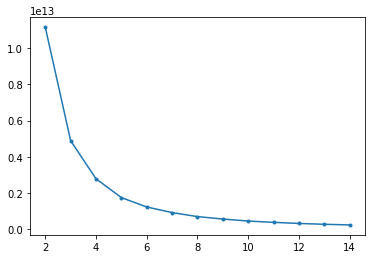

Silhouette predicted 2 clusters. Please enter elbow results:
3


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


K value with best performance: 2
finding clusters


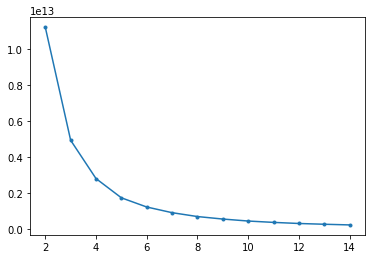

Silhouette predicted 2 clusters. Please enter elbow results:
3


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


K value with best performance: 2
finding clusters


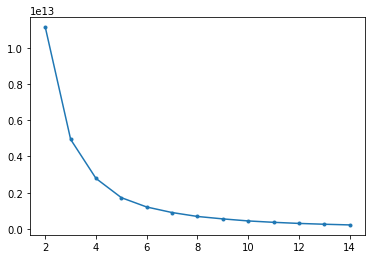

Silhouette predicted 2 clusters. Please enter elbow results:
3


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


K value with best performance: 2
finding clusters


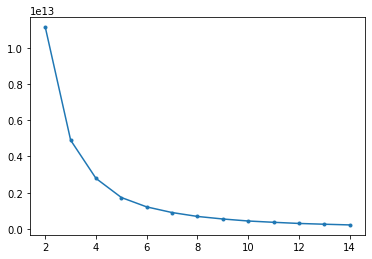

Silhouette predicted 2 clusters. Please enter elbow results:
3


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


K value with best performance: 2
finding clusters


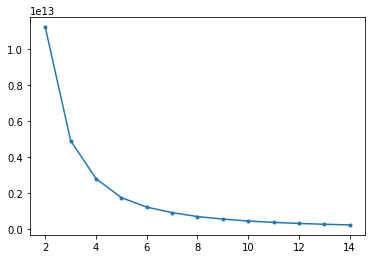

Silhouette predicted 2 clusters. Please enter elbow results:
3


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


K value with best performance: 2
finding clusters


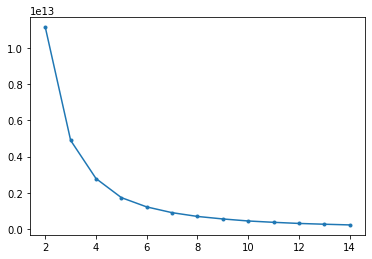

Silhouette predicted 2 clusters. Please enter elbow results:
3


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


K value with best performance: 2
finding clusters


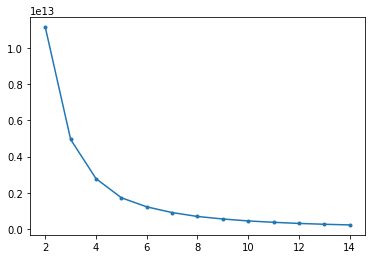

Silhouette predicted 2 clusters. Please enter elbow results:
3


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


K value with best performance: 2
finding clusters


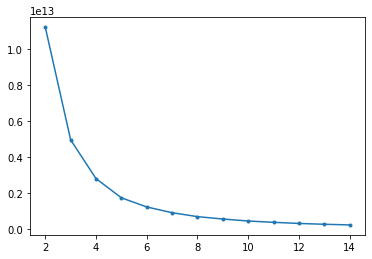

Silhouette predicted 2 clusters. Please enter elbow results:
3


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


K value with best performance: 2
finding clusters


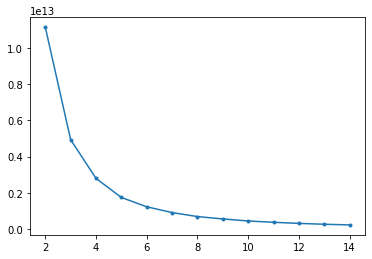

Silhouette predicted 2 clusters. Please enter elbow results:
3


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


K value with best performance: 2
finding clusters


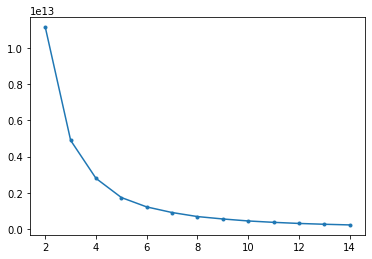

Silhouette predicted 2 clusters. Please enter elbow results:
3


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


K value with best performance: 2


In [24]:
for train, test in skf.split(feat_fraud, lab_fraud):
  test_labels = []

  #Retrieve the predicted amount of clusters and the best performing KMeans model
  n_clusters, final_model = Utils.cluster_and_model(feat_fraud[train], lab_fraud[train])

  #Retrieve the clusters containing missclassified data and the indices of these clusters in the training data
  missclassified_cluster_data_index, missclassified_clusters = Utils.find_missclassified_clusters(n_clusters, lab_fraud[train], final_model.labels_)
  rf_classifiers = [0]*n_clusters
  #Go through the clusters with missclassified data and train a random forest classifier for each
  for i in missclassified_clusters:
    f = feat_fraud[train]
    f1 = f[missclassified_cluster_data_index[i], :]
    l  = lab_fraud[train]
    l1 = np.take(l, missclassified_cluster_data_index[i])
    rf_classifiers[i] = random_forest_clf.fit(f1, l1)
  
  #For each point in test dataset, give it a cluster
  for x in feat_fraud[test]:
    prediction = final_model.predict(np.array([x]))
    if prediction in missclassified_clusters:
      test_labels.append(rf_classifiers[prediction[0]].predict(np.array([x])))
    else:
      test_labels.append(prediction)
  accuracy_scores.append(accuracy_score(test_labels, lab_fraud[test]))
  precision_scores.append(precision_score(test_labels, lab_fraud[test]))
  recall_scores.append(recall_score(test_labels, lab_fraud[test]))
  f1_scores.append(f1_score(test_labels, lab_fraud[test]))

EVALUATING RESULTS FROM PROPOSED ALGORITHM

In [25]:
print("Accuracy:", np.mean(accuracy_scores), "+/-", np.std(accuracy_scores))
print("Precision:", np.mean(precision_scores), "+/-", np.std(precision_scores))
print("Recall:", np.mean(recall_scores), "+/-", np.std(recall_scores))
print("F1-Score:", np.mean(f1_scores), "+/-", np.std(f1_scores))

Accuracy: 0.9867123287671233 +/- 0.009251393975289323
Precision: 0.7088068181818181 +/- 0.2126562727185847
Recall: 0.992153846153846 +/- 0.015696077978441796
F1-Score: 0.8017381752791888 +/- 0.20120125554640636


APPLYING SMOTE SAMPLING

In [0]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)

In [28]:
smote_feat, smote_lab = sm.fit_resample(feat_fraud, lab_fraud)
print("Imbalance:", np.bincount(smote_lab)[0]/(np.bincount(smote_lab)[1]+( np.bincount(smote_lab)[0])))

Imbalance: 0.5


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


EVALUATING RESULTS FROM SMOTE

In [29]:
#Evaluate using decision tree
smote = Utils.evaluatePerformance(tree_clf, smote_feat, smote_lab)

Accuracy: 0.9731069663637812 +/- 0.004896048964116521
Precision: 0.9669345489589501 +/- 0.006987978081900309
Recall: 0.9797745557094876 +/- 0.007579782979086342
F1-Score: 0.9732819379105632 +/- 0.0048960693508108685


In [30]:
#Evaluate using random forest
Utils.evaluatePerformance(rf_clf, smote_feat, smote_lab);

Accuracy: 0.9234808164020919 +/- 0.010074687596964171
Precision: 0.9883141006644991 +/- 0.0037021667814150874
Recall: 0.8571390691995576 +/- 0.021583576311697453
F1-Score: 0.9178938126450564 +/- 0.012094169727335874


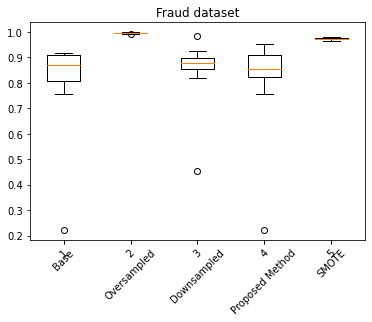

In [31]:
Utils.boxplots("Fraud dataset", base, oversampled, downsampled, f1_scores, smote)